In [1]:
%matplotlib inline
import numpy as np
from numpy import random
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import pickle

import plotly.express as px

In [2]:
import math
import scipy.io as sio
from scipy.stats import pearsonr
from scipy.spatial import distance
from scipy.stats import spearmanr

from ripser import ripser
from persim import plot_diagrams 
import random

import seaborn as sns

In [3]:
%run ../functions.ipynb

## Parameters

In [5]:
fpath_out = '../../Service/BettiCurves/'

minDim = 0
maxDim = 1
nNodes = 90 
nTrials = 100

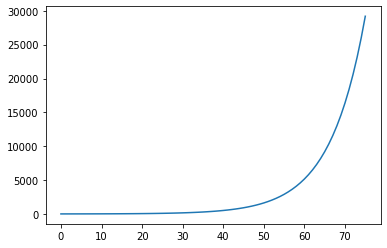

In [6]:
lenSet = np.unique(np.array(np.round(2**np.arange(2,15,1/6)),dtype=int))
# print(lenSet)
plt.plot(lenSet)
plt.show()

## Data

### fMRI ESO

In [6]:
filename = '../../Data/boldEso190.mat'
val = sio.loadmat(filename) # 
dataAll = np.array(val['subj_tcs'])
dataSbj = dataAll[:,:,0].T

print(dataAll.shape)

(400, 90, 190)


In [7]:
dataFMRI = dataAll[:,:,0].T
# Concatinate fMRI of Healthy Controls
for i in range(1,90): #range(1,dataAll.shape[2]):
    dataFMRI = np.concatenate((dataFMRI,dataAll[:,:,i].T),axis=1)
dataFMRI = dataFMRI.T

dataFMRIsz = dataAll[:,:,90].T
# Concatinate fMRI of Schizophrenia patients
for i in range(91,dataAll.shape[2]): 
    dataFMRIsz = np.concatenate((dataFMRIsz,dataAll[:,:,i].T),axis=1)
dataFMRIsz = dataFMRIsz.T

S&P500 for 2003-2013

In [7]:
filename = '../../Data/SP500_YAHOO_mat_export_20050830-20200830.mat'

In [8]:
val = sio.loadmat(filename) # 
log_ret = np.array(val['log_ret'])
log_ret = np.fliplr(log_ret)

dataSP = log_ret[55:55+nNodes,:].T
dataSP.shape

(3913, 90)

Climate - 162 to 90 ROI

In [22]:
filename = '../../Data/air.daily.mean.geodesic162.mat'
val = sio.loadmat(filename) # 
dataClimaBig = np.array(val['anom']) # 'data'
dataClimaBig = dataClimaBig[:,np.arange(0, 162)]
dataClima = dataClimaBig[:,np.random.randint(0,162,nNodes)]

In [23]:
np.shape(dataClima)

(23376, 90)

In [16]:
N_betti_real = {}

## SP500

In [26]:
dataMark = 'SP500'
data_to_test = dataSP

corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        if lenSet[i]>data_to_test.shape[0]:
            break
        else:
            dataCurrent = data_to_test[0:lenSet[i],:]
            corMatr[i] = connectivity(dataCurrent)

ordMatrix = orderMatrix(-corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()


ordMatrix = orderMatrix(corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:11<00:00,  6.80it/s]


In [17]:
dataMark = 'SP500_roll'
data_to_test = np.roll(dataSP,1500)

corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        if lenSet[i]>data_to_test.shape[0]:
            break
        else:
            dataCurrent = data_to_test[0:lenSet[i],:]
            corMatr[i] = connectivity(dataCurrent)

ordMatrix = orderMatrix(-corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()



Loading...: 100%|██████████| 76/76 [00:07<00:00, 10.50it/s]


## FMRI

In [10]:
dataMark = 'fMRI'
data_to_test = dataFMRI

corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        dataCurrent = data_to_test[0:lenSet[i],:]
        corMatr[i] = connectivity(dataCurrent)

ordMatrix = orderMatrix(-corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()


ordMatrix = orderMatrix(corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:10<00:00,  7.33it/s]


In [11]:
dataMark = 'fMRIsz'
data_to_test = dataFMRIsz

corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        dataCurrent = data_to_test[0:lenSet[i],:]
        corMatr[i] = connectivity(dataCurrent)

ordMatrix = orderMatrix(-corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()


ordMatrix = orderMatrix(corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:11<00:00,  6.74it/s]


## Climate data

In [24]:
dataMark = 'clima'
data_to_test = dataClima

corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        dataCurrent = data_to_test[0:lenSet[i],:]
        corMatr[i] = connectivity(dataCurrent)

ordMatrix = orderMatrix(-corMatr)    
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()


ordMatrix = orderMatrix(corMatr)
N_betti_real[dataMark] = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_real[dataMark],outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:46<00:00,  1.63it/s]
